# US Accidents Exploratory data analysis 

## Data Preparation

For the preparations lets first import the necessary libraries and load the file needed for our EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("C:\\Users\\ishit\\Downloads\\archive (1)\\US_Accidents_Dec21_updated.csv")

In [3]:
#It shows the first five rows of the data
data.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
data.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
len(data.columns)

47

There are total 47 columns

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [7]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
len(data.select_dtypes(include=numerics).columns)

14

There are 14 numerical columns in the dataset

Lets see the summary statistics of the columns-

In [8]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


The third and final step in the data preparation stage is to look for missing values. Missing values under different columns can add an unwanted skewness to their distribution, making it complicated to analyze. It is always a good practice to filter such values at the very beginning.

In [9]:
# Finding the total number of missing values for each column
data.isnull().sum().sort_values(ascending = False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

In [10]:
#finding the percentage share of missing values for each column in the entire data
missing_percentages=data.isnull().sum().sort_values(ascending=False)/len(data)

In [11]:
# missing_percentages is of series type
type(missing_percentages)

pandas.core.series.Series

In [12]:
# Remove the ones with zero
missing_percentages[missing_percentages!=0]

Number                   6.129003e-01
Precipitation(in)        1.931079e-01
Wind_Chill(F)            1.650568e-01
Wind_Speed(mph)          5.550967e-02
Wind_Direction           2.592834e-02
Humidity(%)              2.568830e-02
Weather_Condition        2.482514e-02
Visibility(mi)           2.479350e-02
Temperature(F)           2.434646e-02
Pressure(in)             2.080593e-02
Weather_Timestamp        1.783125e-02
Airport_Code             3.356011e-03
Timezone                 1.285961e-03
Nautical_Twilight        1.007612e-03
Civil_Twilight           1.007612e-03
Sunrise_Sunset           1.007612e-03
Astronomical_Twilight    1.007612e-03
Zipcode                  4.635647e-04
City                     4.814887e-05
Street                   7.029032e-07
dtype: float64

Let us now see what the above numbers would look like visually. Plotting a horizontal bar chart as-

<AxesSubplot:>

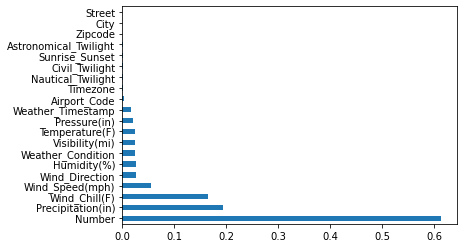

In [13]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

The columns ‘Number’, ‘Precipitation(in)’ and ‘Wind_Chill(F)’ have the most missing values (40–60% of the data). It is wise to either remove the columns altogether or exclude them from the ensuing analysis.

## EDA and Data visualization

Once the data is cleaned and prepped for analysis, we take some of the columns and apply statistical methods to see the underlying picture come to the surface. The following columns have been analyzed in this project-
State,
City,
Start Time,
Temperature,
Weather Condition,
Traffic Signal
and Bump

#### State

The column lists down the name of the US state found in the address of the accident. We want to see the top 10 states by the number of accidents.

In [14]:
data.State

0          OH
1          OH
2          OH
3          OH
4          OH
           ..
2845337    CA
2845338    CA
2845339    CA
2845340    CA
2845341    CA
Name: State, Length: 2845342, dtype: object

In [15]:
len(data.State.unique())

49

Let’s look at the top ten states by the number of accidents. To do this, we need the absolute number of accidents against each state.

In [16]:
accident_by_states=data.State.value_counts()
accident_by_states[:10]

CA    795868
FL    401388
TX    149037
OR    126341
VA    113535
NY    108049
PA     99975
MN     97185
NC     91362
SC     89216
Name: State, dtype: int64

we plot a horizontal bar chart for the top ten states-

<AxesSubplot:>

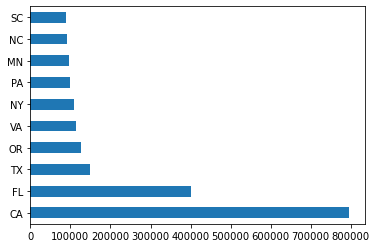

In [17]:
accident_by_states[:10].plot(kind='barh')

### City

The column lists the name of the city in the address record. Let us now check how many cities of the top ten states above feature in the top 30 cities by accidents.

In [ ]:
data.City

In [ ]:
len(data.City.unique())

The total number of cities are 11,790.

In [18]:
accidents_by_cities=data.City.value_counts()
accidents_by_cities

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

The top cities include Miami,Los Angeles, Orlando, Dallas, Houston, Charlotte, etc. Let’s visualize the top 30 cities and see how many belong to the top ten states.

<AxesSubplot:>

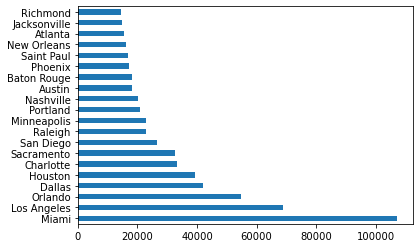

In [19]:
accidents_by_cities[:20].plot(kind='barh')

There is quite a lot of presence of cities from California (LA, Sacramento, San Diego, Jacksonville), followed by Texas (Houston, Dallas, Austin), Florida (Miami, Orlando), and North Carolina (Charlotte, Raleigh). followed by Minnesota(minneapolis)
followed by Oregon(Portland)

<AxesSubplot:xlabel='City', ylabel='Count'>

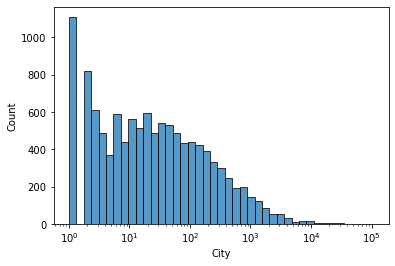

In [20]:
sns.histplot(accidents_by_cities, log_scale=True)

Over 1200 cities have reported only one accident during the entire period. This could either be very good news or it could be a result of missing data. Let’s break cities by accidents into two groups and see their respective distributions-

1.High accident cities where the number of accidents is greater and equal to 1000

In [23]:
high_accident_cities=accidents_by_cities[accidents_by_cities>=1000]
percentage_high_accident_cities=len(high_accident_cities)/len(data.City.unique())*100
percentage_high_accident_cities

4.245848313644924

Low accident cities where the number is less than 1000.

In [25]:
low_accident_cities=accidents_by_cities[accidents_by_cities<1000]
percentage_low_accident_cities=len(low_accident_cities)/len(data.City.unique())*100
percentage_low_accident_cities

95.74559150830338

4.35% of the total number of cities have an accident number greater than 1000.

The distribution of high accident cities -

<AxesSubplot:xlabel='City', ylabel='Count'>

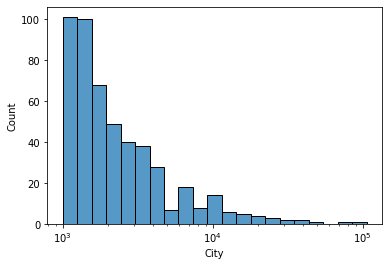

In [26]:
sns.histplot(high_accident_cities,log_scale = True) 

Less than 150 cities (out of 11,790) reported more than 1000 accidents during the period between February 2016 and December 2020. Similarly, the cities with the low number of accidents are picturized as-

<AxesSubplot:xlabel='City', ylabel='Count'>

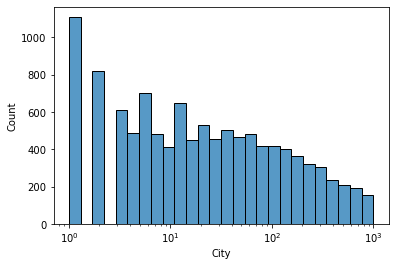

In [27]:
sns.histplot(low_accident_cities, log_scale = True) 

Over 1200 cities have had just one accident in 4years- needs further investigation.

The majority of them have witnessed between 10–100 accidents during the period.

Accidents by cities follow an exponentially decreasing distribution.

# Start time

This column records the start time of the accident in the local time zone.

In [28]:
data.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

Convert the string to Timestamp format using the following-

In [29]:
data_Start_Time=pd.to_datetime(data.Start_Time)

We want to know what time of the day witnesses more accidents. To do this, we pull the hour from the timestamp format above-

In [30]:
#extract hour from timestamp
data_Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

Now, we plot the distribution-

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

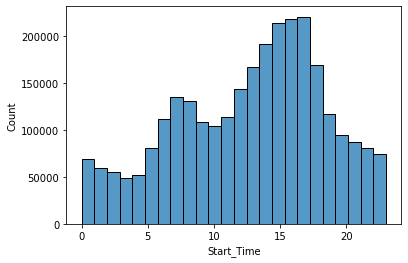

In [31]:
sns.histplot(data_Start_Time.dt.hour,bins=24, kde=False)

There are two peaks of time- one in the morning in between 6 am to 9 am and another between 3 pm and 6 pm. This is consistent with the assumption that rush hours in the morning and evening could lead to more accidents.

Does this trend apply on weekends too? Let us do a Monday and Sunday comparison.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

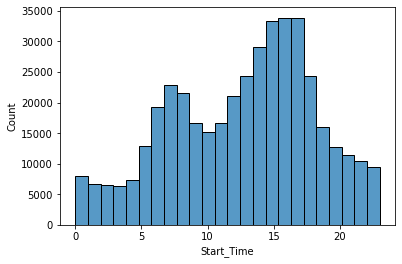

In [88]:
#pull the day of the week from the timestamp format
monday_start_time = data_Start_Time[data_Start_Time.dt.weekday == 0]
#plot the distribution
sns.histplot(monday_start_time.dt.hour, bins = 24, kde=False)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

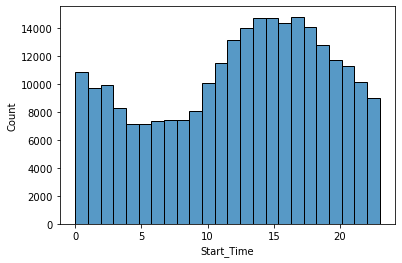

In [89]:
Sunday_Start_Time=data_Start_Time[data_Start_Time.dt.weekday==6]
sns.histplot(Sunday_Start_Time.dt.hour,bins=24)

While Monday follows the general 24-hour pattern- two peaks coinciding with work rush; the distribution for Sunday sees a peak between 12 pm and 7 pm. This could be due to people going out for leisurely activities on Sundays.

We want to know what day of the week witnesses more accidents. we plot the distribution-


<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

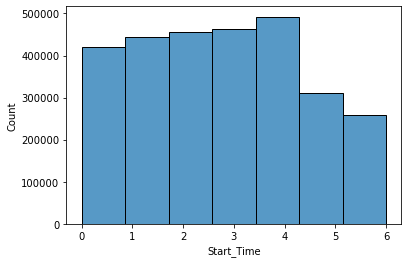

In [90]:
sns.histplot(data_Start_Time.dt.weekday,bins=7)

We can see that weekdays witnesses more accidents.

Lets plot for the monthly distribution of accidents.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

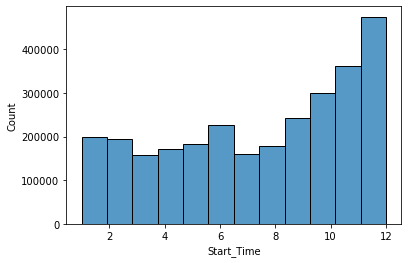

In [65]:
sns.histplot(df_Start_Time.dt.month,bins=12)

we can see that there seems to be a steady upward curve from the second half of the year, as shown below

This could possibly be due to summer break and then the new school term around August-September. But does this hold for all the years under consideration? Let’s look at 2016-

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

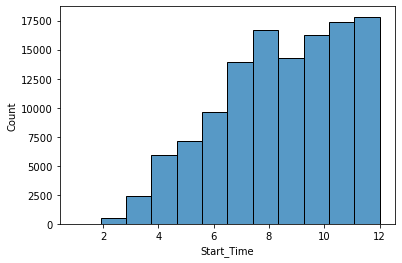

In [66]:
year_2016=data_Start_Time[data_Start_Time.dt.year==2016]
sns.histplot(year_2016.dt.month,bins=12)

Clearly, there is data missing for the month of January (data was collected from February 2016) and July.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

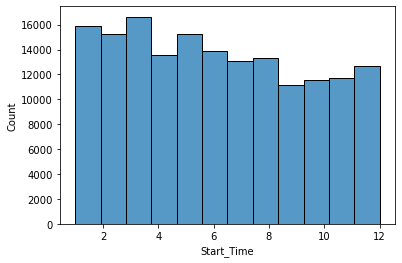

In [68]:
year_2017=df_Start_Time[df_Start_Time.dt.year==2017]
sns.histplot(year_2017.dt.month,bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

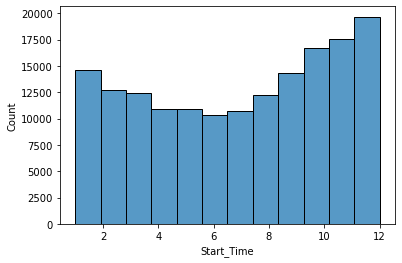

In [69]:
year_2018=df_Start_Time[df_Start_Time.dt.year==2018]
sns.histplot(year_2018.dt.month,bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

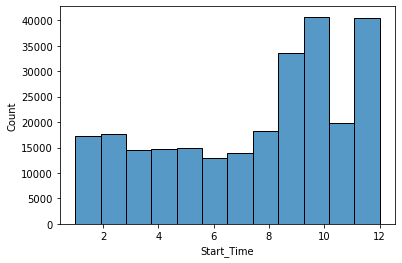

In [70]:
year_2019=df_Start_Time[df_Start_Time.dt.year==2019]
sns.histplot(year_2019.dt.month,bins=12)

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

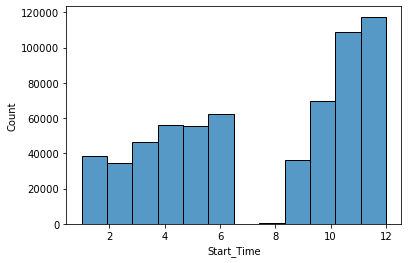

In [71]:
year_2020=df_Start_Time[df_Start_Time.dt.year==2020]
sns.histplot(year_2020.dt.month,bins=12)

Clearly, there is data missing for the month of July and august (data was collected from February 2016) and July.

<AxesSubplot:xlabel='Start_Time', ylabel='Count'>

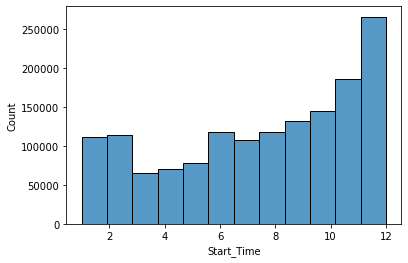

In [72]:
year_2021=df_Start_Time[df_Start_Time.dt.year==2021]
sns.histplot(year_2021.dt.month,bins=12)

The overall picture tells us that the number of accidents recorded are higher in december. But we also have to take into consideration the significant numbers missing.So, the overall picture might be misleading. It could also be attributed to data mismatch if the sources of the collection are varied. This would need further investigation.

### Temperature

This column recorded temperature at the time of the accident in degrees Fahrenheit.

In [91]:
#pull out the column with its frequency distribution
data['Temperature(F)'].value_counts()

 73.0     64505
 77.0     63575
 75.0     60534
 72.0     59681
 68.0     58557
          ...  
 109.8        1
-9.8          1
 170.6        1
 107.2        1
 99.1         1
Name: Temperature(F), Length: 788, dtype: int64

Let’s visualize the above in a boxplot-

<AxesSubplot:xlabel='Temperature(F)'>

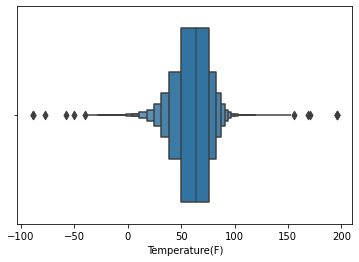

In [101]:
sns.boxenplot(x=data['Temperature(F)'])

So, a chunk of the accidents happens to be in areas experiencing temperatures in the range of (50–60) degrees Fahrenheit. Most accidents occur in colder weather or regions.

### Weather

This column has the description of the weather condition at the time of the accident, such as, “Fair”, “Cloudy”, “Clear” etc.

In [32]:
#pull out the column with its frequency distribution
data.Weather_Condition.value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

Let’s visualize it-

<AxesSubplot:>

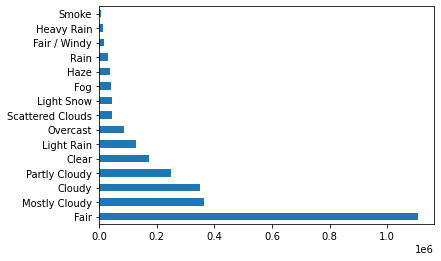

In [33]:
data.Weather_Condition.value_counts()[:15].plot(kind='barh')

Most accidents occured in “Fair”, followed by “Mostly Cloudy” and “Cloudy” sky.

### Traffic signal

A binary column indicating the presence of a traffic signal nearby the spot of the accident.

In [34]:
data['Traffic_Signal']

0          False
1          False
2          False
3          False
4          False
           ...  
2845337    False
2845338    False
2845339    False
2845340    False
2845341    False
Name: Traffic_Signal, Length: 2845342, dtype: bool

Lets visualize it using pie chart.“True” and “False” values is best visualized in a pie-chart-

<AxesSubplot:ylabel='Traffic_Signal'>

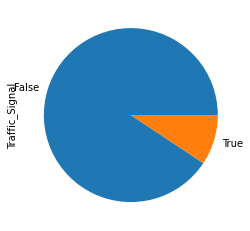

In [35]:
data['Traffic_Signal'].value_counts().plot(kind='pie')

Clearly, poor traffic management is a cause for the chunk of the accidents.

### Bump

A binary column indicating the presence of a speed bump nearby the spot of the accident. 

<AxesSubplot:ylabel='Bump'>

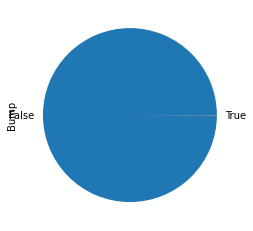

In [36]:
data['Bump'].value_counts().plot(kind='pie')

Speed control mechanisms are inadequate in the recorded accidents

## Insights
The project analyzed various parameters on accident occurrence and the following insights have been found upon drilling the above parameters:

1. The top 5 states by accidents include populous ones like California, Florida, Texas, Oregon and Virginia.

2. The top 5 states by accidents include populous ones like Miami, Los Angeles, Orlando and  Dallas

3. Less than 5% (4.24%) of cities have more than 1000 accidents in the period between February 2016 and December 2020.

4. Over 1200 cities have had just one accident in 4years- needs further investigation.

5. The majority of them have witnessed between 10–100 accidents during the period.

6. Accidents by cities follow an exponentially decreasing distribution.

7. Weekdays witness more accidents during morning and evening rush hours. Weekends have the peak during the afternoon.

8. More accidents happen in weekdays than  weekends.

8. The year-wise analysis seems to show missing data about certain months. So nothing much can be conclusively said about the overall increasing trend in the latter half of the year.

9. The weather conditions seem to be “Fair”, “Clear” and “Mostly Cloudy” in most cases.

10. Poor traffic management is a cause for the chunk of the accidents.

11. Speed control mechanisms are inadequate in the recorded accidents

## Conclusion

It can be said that while the percentage of accidents is low for most cities, it is important to notice that the majority of  accidents seemed to have happened due to the absence of proper traffic management mechanisms like traffic signals and bumps.

## Future Scope

1. Explore per-capita accident figures by adding a state and city-wise population data set.
2. The question of missing data in certain months could be analyzed if there is some data available on the source/s of this one.